# DATA WRANGLING

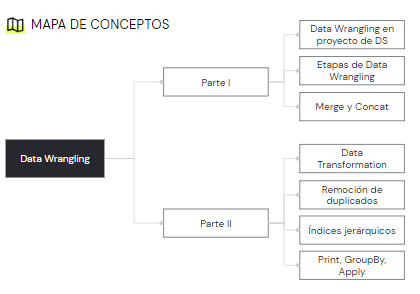

## Definición
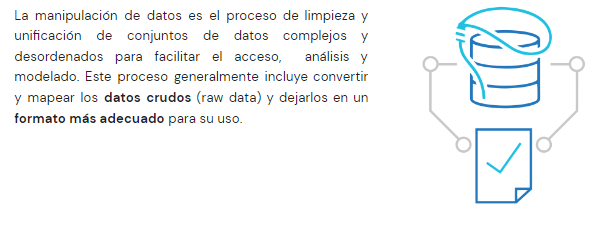

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../datasets/clase15/Train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploración dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Borrar duplicados
train = train.drop_duplicates()

<AxesSubplot:>

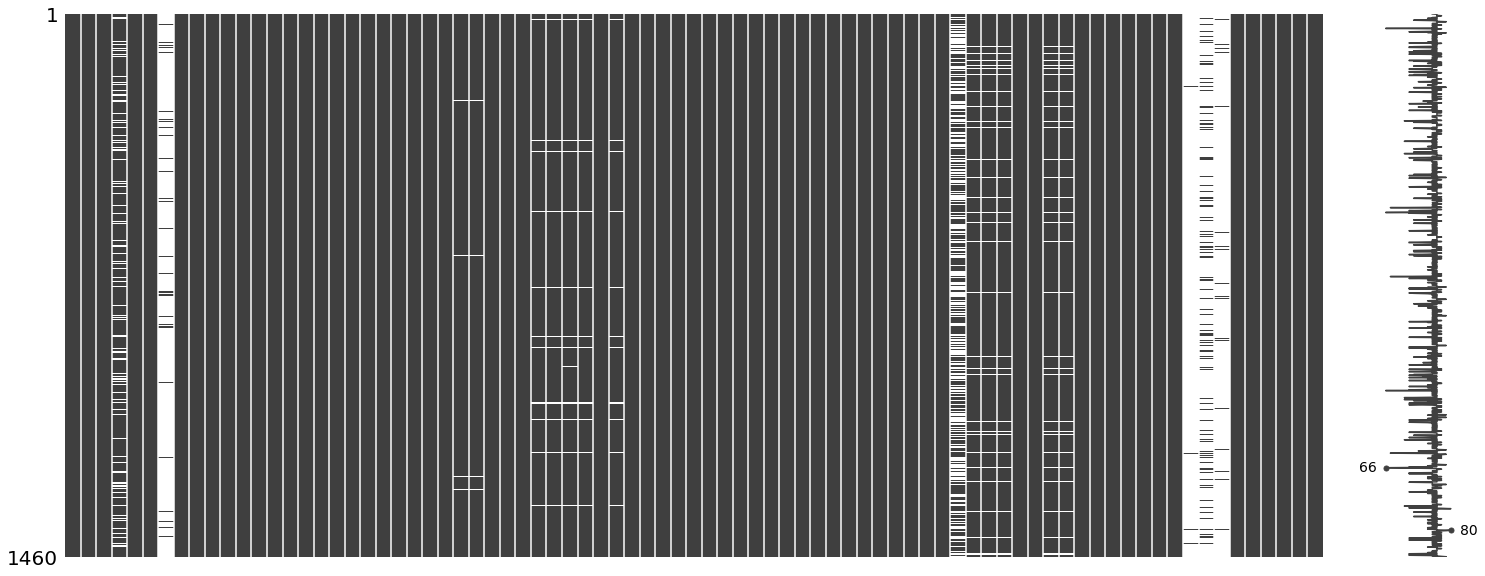

In [6]:
import missingno as msno
msno.matrix(train)
# Blanco: Valores faltantes
# Negro: Valores con dato

## Combinar y fusionar datos con Pandas
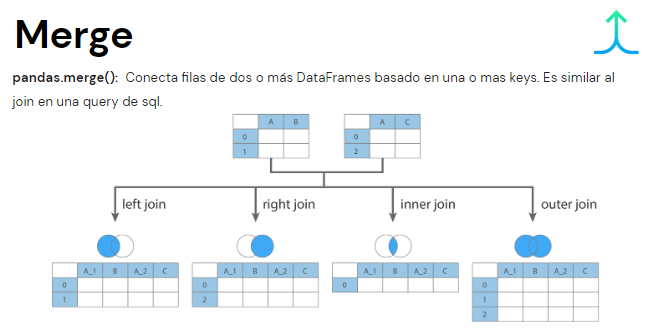

In [7]:
df1 = pd.DataFrame({
    'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
    'first': range(7)
})

df1

,key,first
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [8]:
df2 = pd.DataFrame({
    'key': ['a', 'b', 'd'],
    'second': range(3)
})

df2

,key,second
0,a,0
1,b,1
2,d,2


In [9]:
# left join
pd.merge(left=df1, right=df2, on='key', how='left')

,key,first,second
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [10]:
# right join
pd.merge(df1, df2, on='key', how='right')

,key,first,second
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


In [11]:
# inner join
pd.merge(df1, df2, on='key', how='inner')

,key,first,second
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [12]:
# outer join
pd.merge(df1, df2, on='key', how='outer')

,key,first,second
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


## Concatenar datos con Pandas

In [13]:
clase0 = pd.read_excel('../datasets/clase15/clase0.xlsx')
clase0

,key1,key2,data
0,Buenos Aires,2020,0
1,Buenos Aires,2021,1
2,Buenos Aires,2022,2
3,Cordoba,2021,3
4,Cordoba,2022,4
5,Santa Fe,2020,5
6,Santa Fe,2020,6


In [16]:
clase1 = pd.read_excel('../datasets/clase15/clase1.xlsx')
clase1

,key1,key2,event1,event2
0,Cordoba,2021,0,1
1,Cordoba,2020,2,3
2,Buenos Aires,2020,4,5
3,Buenos Aires,2020,6,7
4,Buenos Aires,2021,8,9
5,Buenos Aires,2022,10,11
6,Santa Fe,2020,12,13
7,Santa Fe,2019,14,15


In [17]:
pd.merge(clase0, clase1, on=['key1','key2'])

,key1,key2,data,event1,event2
0,Buenos Aires,2020,0,4,5
1,Buenos Aires,2020,0,6,7
2,Buenos Aires,2021,1,8,9
3,Buenos Aires,2022,2,10,11
4,Cordoba,2021,3,0,1
5,Santa Fe,2020,5,12,13
6,Santa Fe,2020,6,12,13


In [18]:
c1 = pd.merge(clase0, clase1, on=['key1','key2'], how='right')
c2 = pd.merge(clase0, clase1, on=['key1','key2'], how='left')
c3 = pd.merge(clase0, clase1, on=['key1','key2'], how='outer')
c4 = pd.merge(clase0, clase1, on=['key1','key2'], how='inner')
pd.concat([c1,c2,c3,c4], axis=0)

,key1,key2,data,event1,event2
0,Cordoba,2021,3.0,0.0,1.0
1,Cordoba,2020,NaN,2.0,3.0
2,Buenos Aires,2020,0.0,4.0,5.0
3,Buenos Aires,2020,0.0,6.0,7.0
4,Buenos Aires,2021,1.0,8.0,9.0
5,Buenos Aires,2022,2.0,10.0,11.0
6,Santa Fe,2020,5.0,12.0,13.0
7,Santa Fe,2020,6.0,12.0,13.0
8,Santa Fe,2019,NaN,14.0,15.0
0,Buenos Aires,2020,0.0,4.0,5.0


In [19]:
pd.concat([c1,c2], axis=1)

,key1,key2,data,event1,event2,key1,key2,data,event1,event2
0,Cordoba,2021,3.0,0,1,Buenos Aires,2020.0,0.0,4.0,5.0
1,Cordoba,2020,NaN,2,3,Buenos Aires,2020.0,0.0,6.0,7.0
2,Buenos Aires,2020,0.0,4,5,Buenos Aires,2021.0,1.0,8.0,9.0
3,Buenos Aires,2020,0.0,6,7,Buenos Aires,2022.0,2.0,10.0,11.0
4,Buenos Aires,2021,1.0,8,9,Cordoba,2021.0,3.0,0.0,1.0
5,Buenos Aires,2022,2.0,10,11,Cordoba,2022.0,4.0,NaN,NaN
6,Santa Fe,2020,5.0,12,13,Santa Fe,2020.0,5.0,12.0,13.0
7,Santa Fe,2020,6.0,12,13,Santa Fe,2020.0,6.0,12.0,13.0
8,Santa Fe,2019,NaN,14,15,NaN,NaN,NaN,NaN,NaN


## Desafio generico

In [27]:
customers = pd.read_csv('../datasets/clase15/customers.csv')
customers.head()

,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,5021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden


In [30]:
employees = pd.read_csv('../datasets/clase15/employees.csv')
employees.head()

,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Davolio,Nancy,12/8/1968,EmpID1.pic,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,2/19/1952,EmpID2.pic,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,8/30/1963,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,9/19/1958,EmpID4.pic,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,3/4/1955,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...


In [31]:
orders = pd.read_csv('../datasets/clase15/orders.csv')
orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,7/4/1996,3
1,10249,81,6,7/5/1996,1
2,10250,34,4,7/8/1996,2
3,10251,84,3,7/8/1996,1
4,10252,76,4,7/9/1996,2


In [35]:
# Hacer el inner join
pd.merge(orders, employees, how='inner', on='EmployeeID').sort_values(by='OrderID')[['OrderID','LastName','FirstName']]

,OrderID,LastName,FirstName
0,10248,Buchanan,Steven
11,10249,Suyama,Michael
29,10250,Peacock,Margaret
69,10251,Leverling,Janet
30,10252,Peacock,Margaret
...,...,...,...
28,10439,Suyama,Michael
68,10440,Peacock,Margaret
98,10441,Leverling,Janet
99,10442,Leverling,Janet
